In [4]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

df = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\data science assingment\assignments\association rules\my_movies.csv")

def perform_association_rule_mining(df, min_support=0.1, min_threshold=0.5):
    
    df = df.drop(columns=['V1', 'V2', 'V3', 'V4', 'V5'])
    

    transactions = df.values.tolist()


    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)


    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)


    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)

    return rules

rules = perform_association_rule_mining(df, min_support=0.05, min_threshold=0.6)

print("Association Rules with Custom Parameters:")
print(rules)

Association Rules with Custom Parameters:
  antecedents consequents  antecedent support  consequent support  support  \
0         (0)         (1)                 1.0                 1.0      1.0   
1         (1)         (0)                 1.0                 1.0      1.0   

   confidence  lift  leverage  conviction  zhangs_metric  
0         1.0   1.0       0.0         inf            0.0  
1         1.0   1.0       0.0         inf            0.0  


EDA and Visualization for book_df:
First few rows of the dataframe:
   ChildBks  YouthBks  CookBks  DoItYBks  RefBks  ArtBks  GeogBks  ItalCook  \
0         0         1        0         1       0       0        1         0   
1         1         0        0         0       0       0        0         0   
2         0         0        0         0       0       0        0         0   
3         1         1        1         0       1       0        1         0   
4         0         0        1         0       0       0        1         0   

   ItalAtlas  ItalArt  Florence  
0          0        0         0  
1          0        0         0  
2          0        0         0  
3          0        0         0  
4          0        0         0  

Summary of the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   

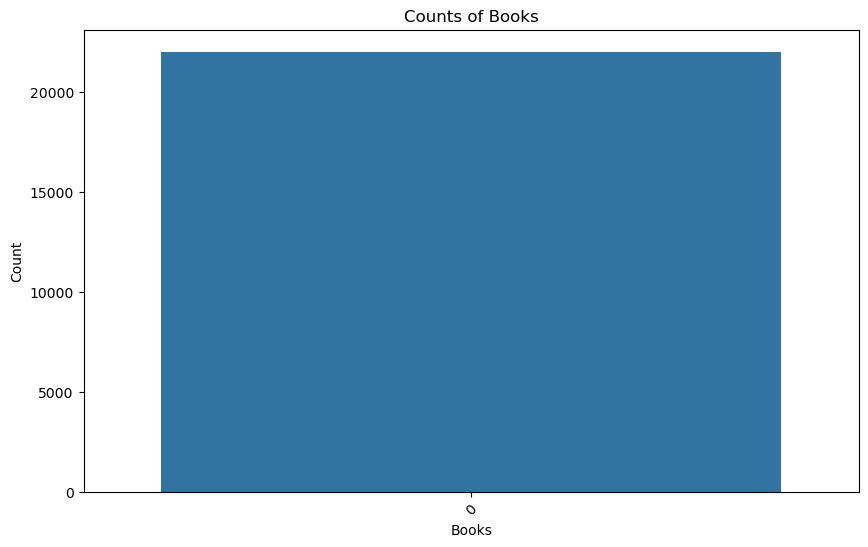

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0         (0)         (1)              0.9990              0.7895   0.7885   
1         (1)         (0)              0.7895              0.9990   0.7885   

   confidence      lift  leverage  conviction  zhangs_metric  
0    0.789289  0.999733 -0.000211      0.9990      -0.210711  
1    0.998733  0.999733 -0.000211      0.7895      -0.001267  


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

def perform_eda_book(df):
    print("First few rows of the dataframe:")
    print(df.head())
    
    print("\nSummary of the dataframe:")
    print(df.info())
    
    print("\nBasic statistics of numerical columns:")
    print(df.describe())
    
    print("\nMissing values:")
    print(df.isnull().sum())
    
    print("\nNumber of duplicate rows:", df.duplicated().sum())
    
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df.melt().dropna()['value'])
    plt.title('Counts of Books')
    plt.xlabel('Books')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

def perform_association_rule_mining(df):
    
    transactions = df.values.tolist()

    
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

    
    frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True)

    
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

    return rules


file_path = r"C:\Users\Owner\OneDrive\Desktop\data science assingment\assignments\association rules\book.csv


book_df = pd.read_csv(r"C:\Users\Owner\OneDrive\Desktop\data science assingment\assignments\association rules\book.csv")



print("EDA and Visualization for book_df:")
perform_eda_book(book_df)


rules = perform_association_rule_mining(book_df)


print("Association Rules:")
print(rules)

